In [1]:
# Li's Project
# Adding the W-boson and b-quark channels to P-ONE

In [2]:
# imports
from constants import pdm_constants as const
from config import config
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np
import matplotlib.pyplot as plt
from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
from scipy.interpolate import UnivariateSpline
from scipy.stats import chi2
from scipy.stats import *
from pone_aeff import Aeff
import pickle
import math
import pandas as pd
import csv
from matplotlib import rc

In [3]:
# picture path
PICS = '../pics/'
name=[r'$\nu_{\mu}$', r"$\nu_e$", r"$\nu_{\tau}$"]  # ,r'$\nu_{e}$',r'$\nu_{\tau}$'
# Plotting standards
std_size = 6.  # Size of the plot
fontsize = 15.  # Fontsize in the plot
lw=0.1  # Linewidth
h_length=0.5  # Handle length for the legends
export_dpi = 500  # Dpi for the image export
color_pone='#7570b3'
color_ice='#e7298a'
color_combined='#33a02c'
color_thermal='#1f78b4'
color_unitary='k'
color_4='#1b9e77'
color_6='#d95f02'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [4]:
surface_fluxe = pickle.load(open("../data/" +
                                                   "surf_store_v1.p", "rb"))
projection_ice = pickle.load(open('../data/background_ice.pkl','rb'))
projection_pone = pickle.load(open('../data/background_pone_unsm.pkl','rb'))

In [5]:
e_grid_mceq = surface_fluxe[0][0]

In [6]:
dm2nu = DM2Nu()

In [7]:
m_grid = [100, 1e3, 1e4, 1e5]

In [8]:
nu_e = pd.read_csv(open('../data/Li_project/nu_e.dat', 'rb'), delim_whitespace=True)

In [9]:
m_5 = nu_e[nu_e['mDM'] == 5]

In [10]:
logx_grid = m_5['Log[10,x]']

In [11]:
e_grid = 5 * 10**logx_grid

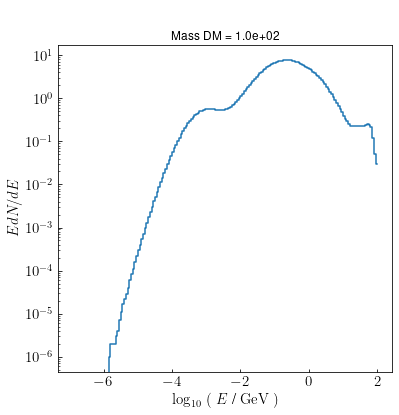

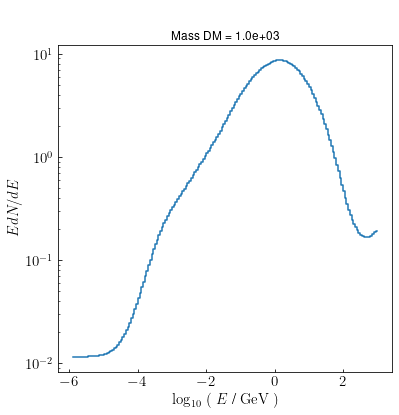

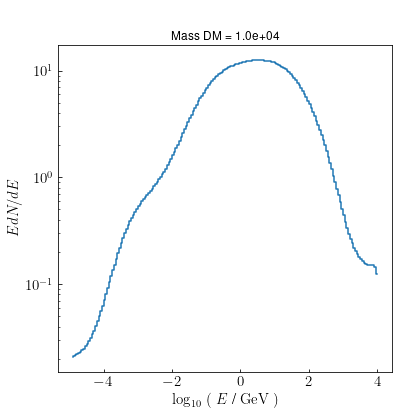

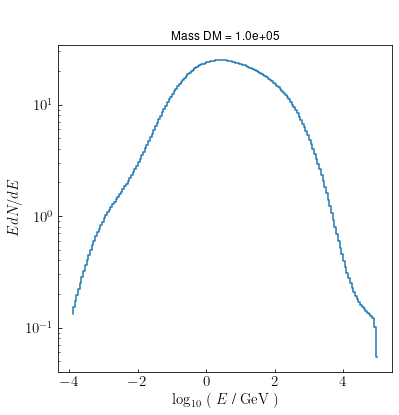

In [12]:
for i,m in enumerate(m_grid):
    e_grid = m * 10**nu_e[nu_e['mDM'] == m]['Log[10,x]']
    dNdE = nu_e[nu_e['mDM'] == m]['W']
    figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
    ax1.set_title('Mass DM = %.1e' % (m))
    ax1.step(np.log10(e_grid), dNdE)

    ax1.set_yscale("log")
    # ax1.set_xscale("log")
    ax1.set_xlabel(r'$\log_{10}$ $($ $E$ / $\textrm{GeV}$ $)$ ', fontsize=fontsize)
    ax1.set_ylabel(r'$E  dN/dE$', fontsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
    #ax1.set_xlim(2, 7)
    #ax1.set_ylim(1e-10,1e-5)
    h, l = ax1.get_legend_handles_labels()
    lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +1.1),
                     ncol=2, fontsize=fontsize, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd1)

    # ---------------------------------------------
    # Showing the image
    plt.show()
    #figure.savefig(PICS + "Final_flux"+".png",
    #               bbox_inches='tight', dpi=export_dpi, facecolor='white')


In [13]:
nu_e = pd.read_csv(open('../data/Li_project/nu_e.dat', 'rb'), delim_whitespace=True)
phi_nue = []
phi_dm2nu = []
for i,m in enumerate(m_grid):
    e_grid = m * 10**nu_e[nu_e['mDM'] == m]['Log[10,x]']
    dNdlogE = nu_e[nu_e['mDM'] == m]['b']
    # dNdlogE_mc = UnivariateSpline(e_grid, dNdlogE, k=1, s=0)(e_grid_mceq)
    phi_nue.append((dm2nu.extra_galactic_flux(e_grid, m, 1e-26)) * np.array(dNdlogE) / np.array(e_grid))
    phi_dm2nu.append((dm2nu.dphide_channel(e_grid_mceq, m, 1e-26))  / np.array(e_grid_mceq) )

/home/kruteesh/miniconda3/envs/pdm/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kruteesh/miniconda3/envs/pdm/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kruteesh/miniconda3/envs/pdm/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kruteesh/miniconda3/envs/pdm/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kruteesh/miniconda3/envs/pdm/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/kruteesh/miniconda3/envs/pdm/lib/python3.9/s

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


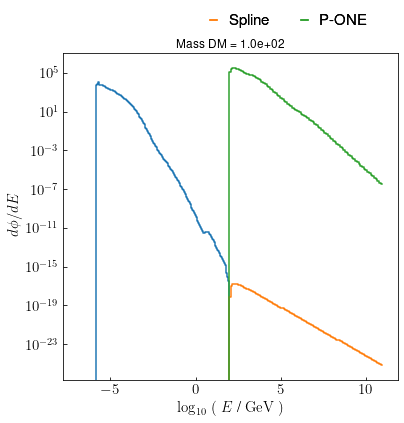

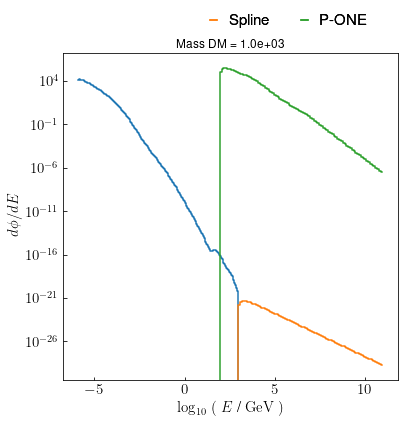

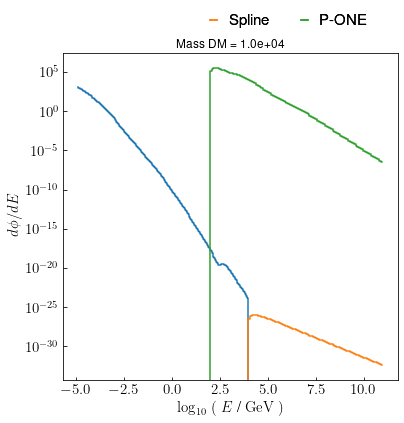

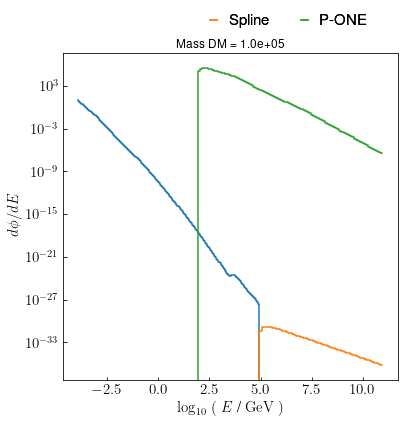

In [14]:
for i,m in enumerate(m_grid):
    e_grid = m * 10**nu_e[nu_e['mDM'] == m]['Log[10,x]']
    dNdE = nu_e[nu_e['mDM'] == m]['b']
    figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
    ax1.set_title('Mass DM = %.1e' % (m))
    ax1.step( np.log10(e_grid), phi_nue[i])
    ax1.step( np.log10(e_grid_mceq), phi_dm2nu[i], label=r'Spline')
    ax1.step(np.log10(e_grid_mceq), projection_pone['numu'], label=r'P-ONE')
    ax1.set_yscale("log")
    # ax1.set_xscale("log")
    ax1.set_xlabel(r'$\log_{10}$ $($ $E$ / $\textrm{GeV}$ $)$ ', fontsize=fontsize)
    ax1.set_ylabel(r'$d\phi / dE $', fontsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
    #ax1.set_xlim(2, 7)
    #ax1.set_ylim(1e-10,1e-5)
    h, l = ax1.get_legend_handles_labels()
    lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +1.1),
                     ncol=2, fontsize=fontsize, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd1)

    # ---------------------------------------------
    # Showing the image
    plt.show()
    #figure.savefig(PICS + "Final_flux"+".png",
    #               bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [15]:
config['general']['detector']='POne'
config['general']['pone type'] = 'old'
dete = Detector(Aeff())

In [16]:
# dete.sim_to_dec()